# Least Square Regression and Residual Plots in Python

After learning about Regression Analysis and Residuals in one of my stats classes, I decided to do this small project on how you can manually do least square regression fit and residual plots in Python using Anaconda Jupyter Notebook. I have very very small well-organized dataset to work with, just for purpose of illustration and clear understanding. (Mostly in real world data example, you will encounter huge huge datasets to work with.They might not even be organized or well-structured. We call that, 'unclean' data. Yes, it's uncleaned because you will have to first organize and structure it well before doing your analysis or in technical terms 'clean' it.) Okay, I have my dataset in my computer so let me fetch it here in this notebook and get it ready for analysis.

## Getting the data ready for analysis.
In this project I will be working with Python's Pandas and NumPy libraries for data analysis and manipulation, together with Matplotlib and Seaborn libraries for visualizations (plotting).

In [1]:
# I will start by getting the imports that I need for this project
# below are the imports for data analysis and manipulation
import pandas as pd 
from pandas import Series, DataFrame
import numpy as np

# these here are the imports for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# this is the command for allowing the plots or visualizations to appear inside this ipython notebook
# it's one of the 'magic' commands in Python
%matplotlib inline

C:\Users\BEN KOLE\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# I will now grab the file that contains my data and set it as a dataframe. I have stored it in .xlsx format
my_file = pd.ExcelFile('regression_data.xlsx')

What I have done above is that I have grabbed the file that contains my data and given it a name  called 'my_file'. This is so that I can easily call out it any time I need it instead of repeating the codes everytime I need the file.

In [3]:
# Let's check what this file
my_file

Great, pandas is telling us that it's an excel object. BUT, we are not seeing the data yet! So, what are we supposed to do? Well, remember an excel workbook can contain one or multiple sheets. Therefore we will have to investigate this excel object that we have and check out the sheets available by calling *.sheet_names* property on the 'my_file' object.

In [4]:
# check the sheets available in 'my_file'
my_file.sheet_names

['Sheet1']

Okay, there is only one sheet in my excel file workbook and this is the sheet that contains my data. To make the data in this sheet a dataframe, I will call the *.parse()* method on 'my_file' and then assign it to a variable called 'regress_data'

In [5]:
# parse sheet1 in my_file into a dataframe 
regress_data = my_file.parse()

Cool, a dataframe called 'regress_data' has been formed. Let's check out how it looks like.

In [6]:
# inspect the regress_data dataframe
regress_data

,Variable_X,Variable_Y
0,1,10
1,2,8
2,3,12
3,4,16
4,5,20


In [7]:
# to view the first five rows, we call a .head() method on the dataframe
# for our case here, there are only five rows for the whole dataframe so all the rows will show up
regress_data.head()

,Variable_X,Variable_Y
0,1,10
1,2,8
2,3,12
3,4,16
4,5,20


To get some general information about the dataframe, we call a *.info()* method on the dataframe. 

In [8]:
# check general information about the dataframe
regress_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Variable_X  5 non-null      int64
 1   Variable_Y  5 non-null      int64
dtypes: int64(2)
memory usage: 208.0 bytes


There are 2 variables (columns) and 5 entries (rows) to work with. All columns contain numerical data (integers).

Great! We now have our data ready for analysis! 

## Least Square Regression Fit

Regression analysis is one of the techniques used to analyse linear relationship between two numerical variables. Now, a simple and quick way of figuring out if there exist a linear relationship between two numerical variables is by plotting a scatter diagram. So, anytime you investigate on linear relationship between two variables, it's advisable that you first do a scatter diagram to see what pattern the data points form or take.

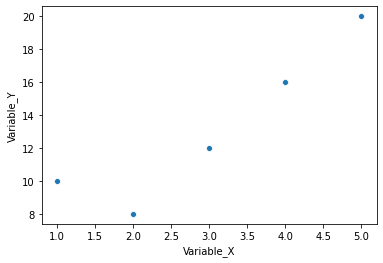

In [9]:
# make a scatter diagram of the two variables
sns.scatterplot(x='Variable_X',y='Variable_Y',data=regress_data)

Cool! Looks like the data points are distributed in a way that tends to form a linear pattern. Therefore, by a quick glance we can deduce that there exist a linear relationship between Variable_X and Variable_Y. We would like to investigate this relationship further. A few questions to start with for this project are: 
1. can we come up with a regression function or model for this data?
2. using the model or function, can we predict the value of Variable_Y (the dependent variable) given a certain value of Variable_X (the independent variable)?

With Python, you can easily fit a regression line for the data by just one line of code. This is achieved using seaborn's *lmplot()* function.

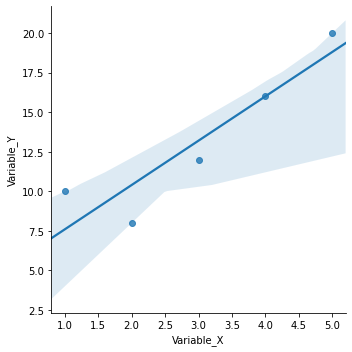

In [10]:
# scatter diagram with regression line
sns.lmplot(x='Variable_X',y='Variable_Y',data=regress_data)

However, for our case here, we want to manually come up with a regression function that gives Variable_Y estimates for every given value of Variable_X.

In [11]:
# let's inspect our dataframe again
regress_data.head()

,Variable_X,Variable_Y
0,1,10
1,2,8
2,3,12
3,4,16
4,5,20


From Statistics, the least square regression equation is:

$y = b_0 + b_1x$

$b_1= \frac{SS_{xy}}{SS_x} =\frac{\sum{( x − \bar{x} )( y − \bar{y} )}}{\sum{( x − \bar{x} )}^2}$

$b_0 = \bar{y} - b_1\bar{x}$
    
where:

$b_1$ = slope

$b_0$ = y-intercept

$SS$ stands for sum of squares. So we are summing up squares. However, for the subscript xy,
we aren’t really summing up squares, but we can just think of it that way in a weird sense.

$SS_{xy}= \sum{( x − \bar{x} )( y − \bar{y} )}$

$SS_x = \sum{( x − \bar{x} )}^2$

$SS_y = \sum{( y − \bar{y} )}^2$

That is a lot of Mathematics! Let's put it in Python now!

In [12]:
# find the slope and intercept of the regression line
#SSxy
SSxy = sum((regress_data['Variable_X']-regress_data['Variable_X'].mean())*(regress_data['Variable_Y']-(regress_data['Variable_Y'].mean())))

# sum of squares of x, SSx
SSx = sum((regress_data['Variable_X']-regress_data['Variable_X'].mean())**2)

# compute the slope
slope = SSxy/SSx

# compute the y-intercept
intercept = regress_data['Variable_Y'].mean() - slope*regress_data['Variable_X'].mean()

Great, we have computed the values for $SS_{xy}$, $SS_x$, hence computed the slope and the intercept too. Having done that, let's print out our regression function using the values of the slope and the intercept.

In [13]:
# print the slope and the intercept as an equation (to 1 decimal place)
print('y = %.1f + %.1fx'%(intercept,slope))

y = 4.8 + 2.8x


Cool, our regression function for the two variables we have in our data is;

$$y = 4.8 + 2.8x$$

With this equation, we can predict the value of $y$ for any given value of $x$. To illustrate this, we are going to create another column in our dataframe for the Variable_Y estimate value for each value of Variable_X.

In [14]:
# let's inspect our dataframe once more
regress_data.head()

,Variable_X,Variable_Y
0,1,10
1,2,8
2,3,12
3,4,16
4,5,20


I would make some changes before we continue. I want to rename 'Variable_X' column to just be 'x' and 'Variable_Y' column to simply be 'y'. I will use a dictionary to do the renaming.

In [15]:
# rename 'Variable_X' column to 'x' and 'Variable_Y' column to 'y'
regress_data = regress_data.rename(columns={'Variable_X':'x','Variable_Y':'y'})

In [16]:
# inspect the dataframe with the changes
regress_data.head()

,x,y
0,1,10
1,2,8
2,3,12
3,4,16
4,5,20


Okay, our dataframe columns are now renamed. So, let's create the 'y_estimate' column. We shall take the regression equation into a python function and apply it to our dataframe using the *.apply()* method.

In [17]:
# create a python function that takes in the value of x as an argument and return the value of y
# since we have already computed the slope and the intercept, we will just call them inside this function
# we shall call this python function 'regfunc'
def regfunc(x):
    return intercept + slope*x

The 'regfunc' python function has been created so let's apply it to our dataframe. 

In [18]:
# create a column for y-estimate by applying the 'regfunc' function to the dataframe
regress_data['y_estimate'] = regress_data['x'].apply(regfunc)

In [19]:
# inspect the dataframe with the newly added 'y_estimate' column
regress_data.head()

,x,y,y_estimate
0,1,10,7.6
1,2,8,10.4
2,3,12,13.2
3,4,16,16.0
4,5,20,18.8


And there we have it! 

In [20]:
# Note that we could have just achieved the above results by defining the 'y_estimate' column as below
"""
regress_data['y_estimate'] = intercept + slope*regress_data['x']
"""
# if you try out this code inside the docstrings, it will work out and bring the same results
# however, using a python function is a fast way

"\nregress_data['y_estimate'] = intercept + slope*regress_data['x']\n"

What if we draw a scatterplot of the y_estimate values against x values and draw a regression line across the points?

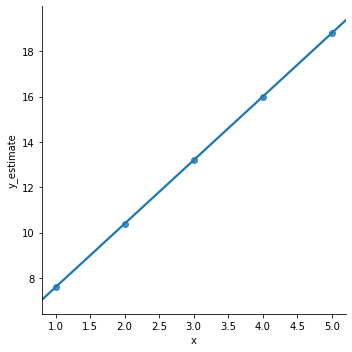

In [21]:
# create a scatterplot of y_estimate against x, with a regression line using seaborn's .lmplot()
sns.lmplot(x='x',y='y_estimate',data=regress_data)

You notice that it's a perfect regression line! This is because we are plotting the predicted/estimated values of y (from the regression equation) against the values of x. And since they are the estimated values from the regression function, the regression line passes perfectly through these points.

## Residuals
A residual is the difference between the actual value of y and the predicted/estimated value of y i.e;
$y - \hat y$, for any given value of x. Let's add another column to our dataframe for the residuals.

In [23]:
# add a residual column to the dataframe by subtracting y-estimate from y.
regress_data['residual'] = regress_data['y'] - regress_data['y_estimate']

In [24]:
# inspect the dataframe to see the changes
regress_data.head()

,x,y,y_estimate,residual
0,1,10,7.6,2.4
1,2,8,10.4,-2.4
2,3,12,13.2,-1.2
3,4,16,16.0,0.0
4,5,20,18.8,1.2


Now, let's plot the residuals against values of x and draw a horizontal line across the 0 value in the y-axis. This is called a *residual plot*.

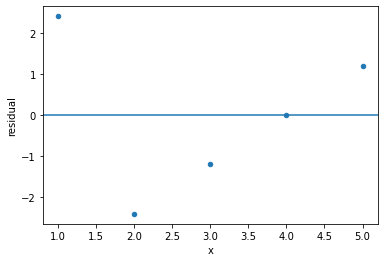

In [25]:
# plot residuals against values of x
regress_data.plot(x='x',y='residual',kind='scatter')
plt.axhline()

### N/B: 
The residuals add up to close to 0. Hence, the mean of residuals is always close to 0. 

That is it for this project!!!

### Thanks!